In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing our Train DataSet
* Look out for features
* See what all datas are missing
* Maybe do some feature engineering and pre-processing

In [2]:
df=pd.read_excel("DataSet/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
pip install xlrd==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel("DataSet/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df["Total_Stops"].isna().value_counts()

False    10682
True         1
Name: Total_Stops, dtype: int64

In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 30m      1
36h 25m      1
30h 10m      1
35h 35m      1
27h 30m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
pd.DataFrame(df.isna().value_counts())

0
Airline Date_of_Journey Source Destination Route Dep_Time Arrival_Time Duration Total_Stops Additional_Info Price       
False   False           False  False       False False    False        False    False       False           False  10682
                                           True  False    False        False    True        False           False      1

In [11]:
df["Route"].isna().value_counts()

False    10682
True         1
Name: Route, dtype: int64

In [12]:
df["Date_of_Journey"].isna().sum()

0

In [13]:
df.dropna(inplace=True)

In [14]:
df.Route.isna().value_counts()

False    10682
Name: Route, dtype: int64

In [15]:
df.shape

(10682, 11)

# EDA and Data-Pre-Processing

In [16]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [17]:
def Data_Pre_Processing(df):
    
    # Dealing with date-time scenario
    df["Journey_Date"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
    df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
    df.drop(["Date_of_Journey"],axis=1,inplace=True)
    
    # Similarly going for departure time
    df["Dep_Hour"]=pd.to_datetime(df.Dep_Time).dt.hour
    df["Dep_Minute"]=pd.to_datetime(df.Dep_Time).dt.minute
    df.drop(["Dep_Time"],axis=1,inplace=True)
    
    # Dealing with arrival time by extracting hours and date
    df["Arrival_Hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
    df["Arrival_Minute"]=pd.to_datetime(df.Arrival_Time).dt.minute
    df.drop(["Arrival_Time"],axis=1,inplace=True)
    
    # Extracting Hours and Minutes from Duration Time
    duration = list(df["Duration"])
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
            else:
                duration[i] = "0h " + duration[i]           # Adds 0 hour
    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        duration_hours.append(int(float(duration[i].split(sep = "h")[0])))    # Extract hours from duration
        duration_mins.append(int(float(duration[i].split(sep = "m")[0].split()[-1]))) # Extract minutes from duration
    df["Duration_hours"]=duration_hours
    df["Duration_minutes"]=duration_mins
    df.drop(["Duration"],axis=1,inplace=True)
    
    # Dealing with categorical Data
    Airlines=df[["Airline"]]
    Airlines = pd.get_dummies(Airlines,drop_first=True)
    Sources=df[["Source"]]
    Sources = pd.get_dummies(Sources,drop_first=True)
    Destinations=df[["Destination"]]
    Destinations = pd.get_dummies(Destinations,drop_first=True)
    df.drop(["Route","Additional_Info","Airline","Destination","Source"],axis=1,inplace=True) # We drop route since 'Route' & 'Total-Stops' convey the same thing
    
    # While dealing with Total Stops we use label encoding since it's an ordered data set
    df.replace({"non-stop":0,
               "1 stop":1,
               "2 stops":2,
               "3 stops":3,
               "4 stops":4}, inplace=True)
    
    # Adding all the categorical values in the data frame by using `concat`
    df = pd.concat([df,Airlines,Sources,Destinations],axis=1)
    
    return df

In [18]:
df=Data_Pre_Processing(df)

In [19]:
df.shape

(10682, 30)

In [20]:
df

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_Date                               10682 non-null  int64
 3   Journey_Month                              10682 non-null  int64
 4   Dep_Hour                                   10682 non-null  int64
 5   Dep_Minute                                 10682 non-null  int64
 6   Arrival_Hour                               10682 non-null  int64
 7   Arrival_Minute                             10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_minutes                           10682 non-null  int64
 10  Airline_Air India                          106

In [22]:
test_df=pd.read_excel("DataSet\Test_set.xlsx")

In [23]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [24]:
test_df=Data_Pre_Processing(test_df)

In [25]:
test_df.shape

(2671, 28)

In [26]:
df.shape

(10682, 30)

# Feature Selection
* Heatmap
* feature_importance_
* SelectKBest

In [27]:
# Splitting our data
X=df.drop(["Price"],axis=1)
y=df["Price"]

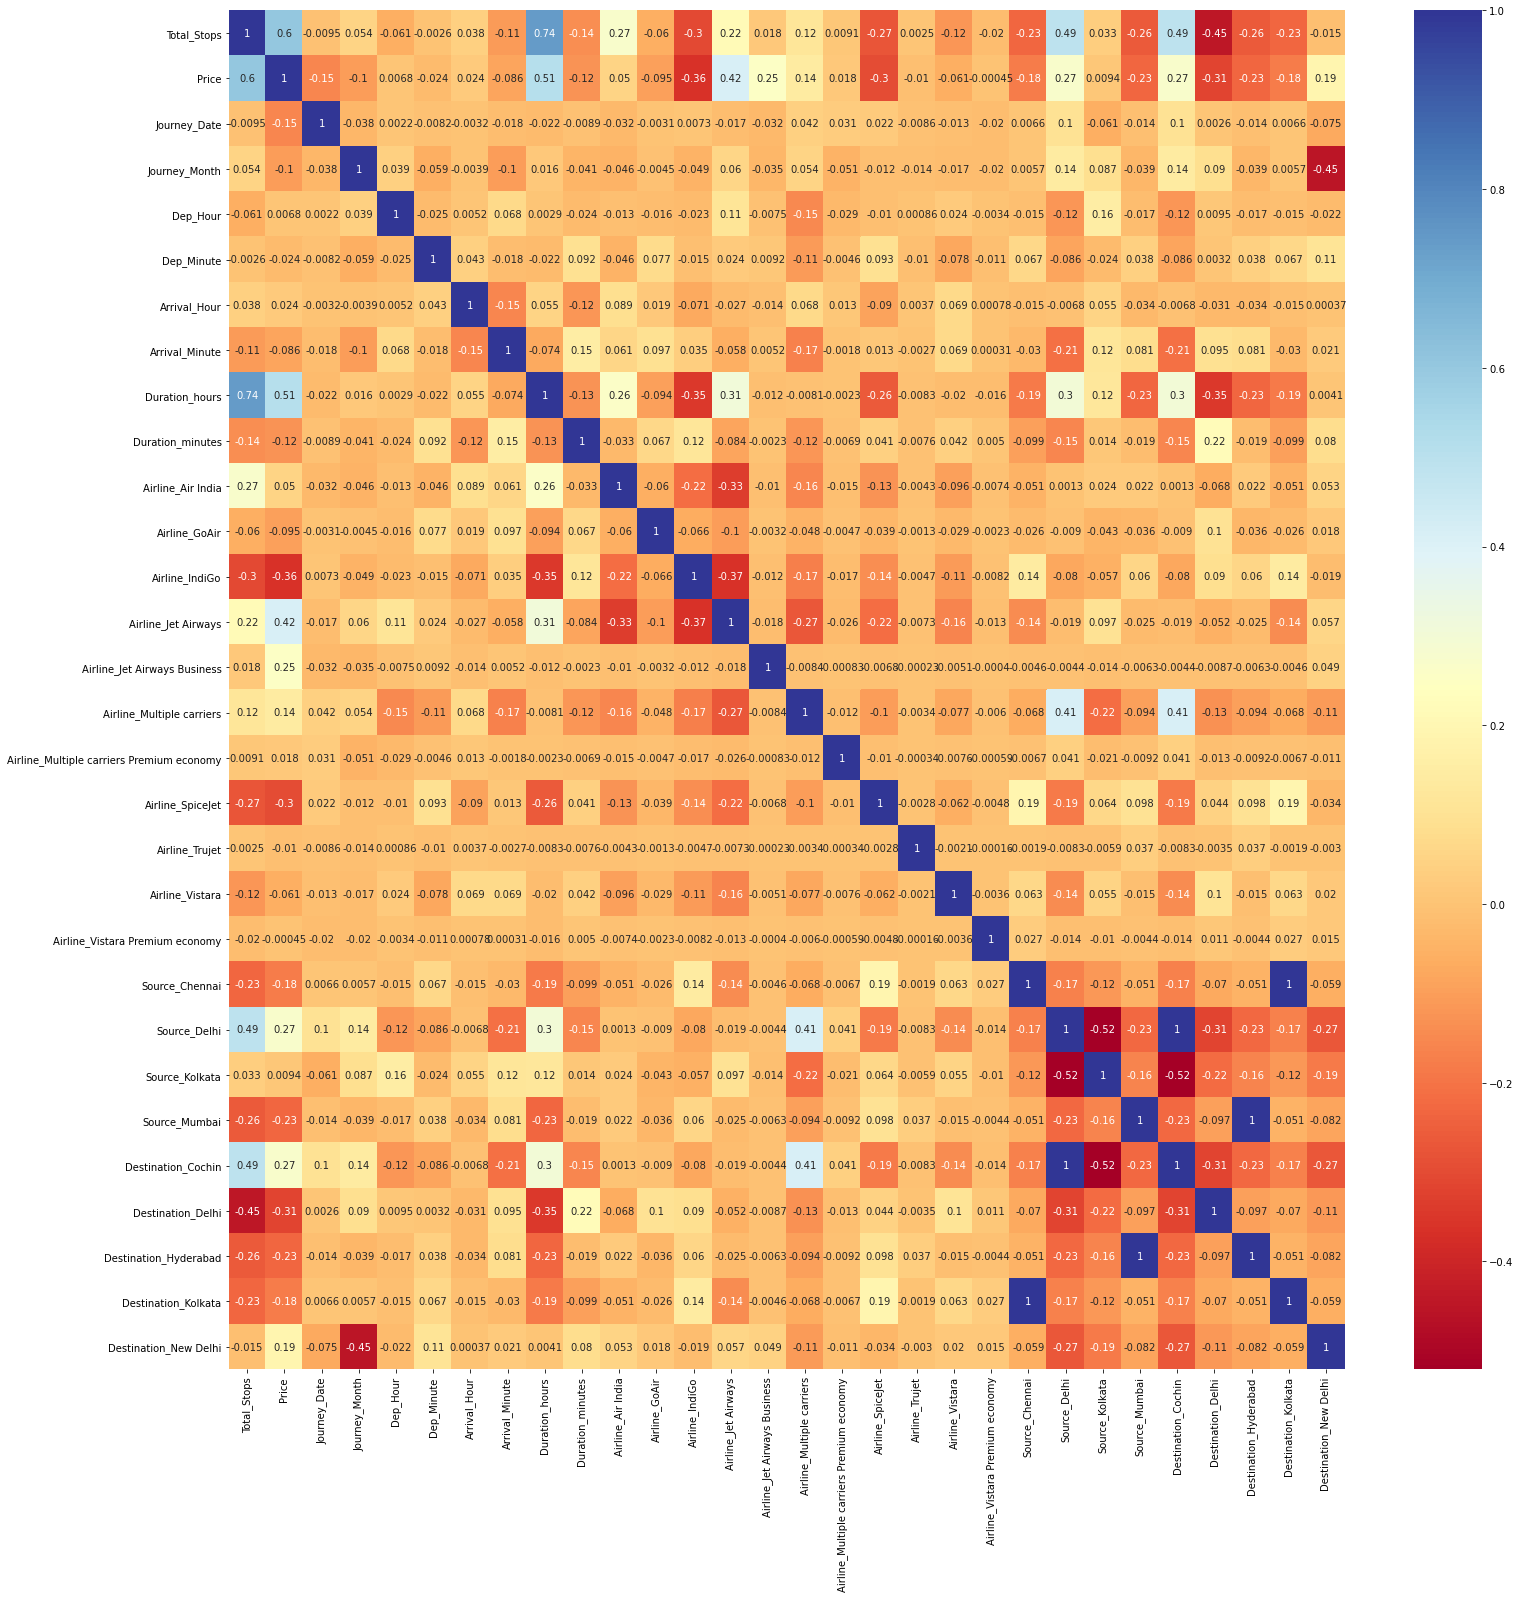

In [28]:
# 1. Using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
plt.show();

## Model Selection and Evaluation

In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import SGDClassifier
np.random.seed(42)

models={"RandomForestRegressor":RandomForestRegressor(),
       "ExtraTreesRegressor":ExtraTreesRegressor(),
       "SGDClassifier":SGDClassifier()}

def Model_Fitting_And_Scoring(models,X,y):
    train_preds={}
    model_scores={}
    from sklearn.metrics import mean_squared_log_error
    def rmsle(y_true,y_preds):
        return np.sqrt(mean_squared_log_error(y_true,y_preds))
    for name,models in models.items():
        models.fit(X,y)
        train_preds[name]=models.predict(X)
        model_scores[name]=rmsle(y,train_preds[name])
    return model_scores
model_evaluation={}
model_evaluation=Model_Fitting_And_Scoring(models=models,X=X,y=y)

Wall time: 51.7 s


In [30]:
model_evaluation

{'RandomForestRegressor': 0.10553429942025334,
 'ExtraTreesRegressor': 0.09458049903473902,
 'SGDClassifier': 0.45875438281599873}

### Choosing Extra Tree Regressor as our final model

In [31]:
from sklearn.metrics import mean_squared_log_error
model=ExtraTreesRegressor()
model.fit(X,y)
train_preds=[]
train_preds=model.predict(X)
def rmsle(y_true,y_preds):
        return np.sqrt(mean_squared_log_error(y_true,y_preds))
model_score=rmsle(y,train_preds)

In [32]:
model,model_score

(ExtraTreesRegressor(), 0.09458057790568754)

In [33]:
model.feature_importances_

array([2.37070583e-01, 1.43425268e-01, 5.31970177e-02, 2.40157650e-02,
       2.15851595e-02, 2.81700567e-02, 1.90683252e-02, 1.16182515e-01,
       1.78213962e-02, 8.86551680e-03, 1.96735569e-03, 1.80999334e-02,
       1.36898825e-01, 6.69736036e-02, 1.80082552e-02, 8.77092853e-04,
       3.35897358e-03, 1.31659929e-04, 5.02274505e-03, 9.31822775e-05,
       4.47663552e-04, 1.06503251e-02, 3.42138567e-03, 6.17129277e-03,
       9.78797355e-03, 1.54658617e-02, 8.07282101e-03, 4.50052803e-04,
       2.46993937e-02])

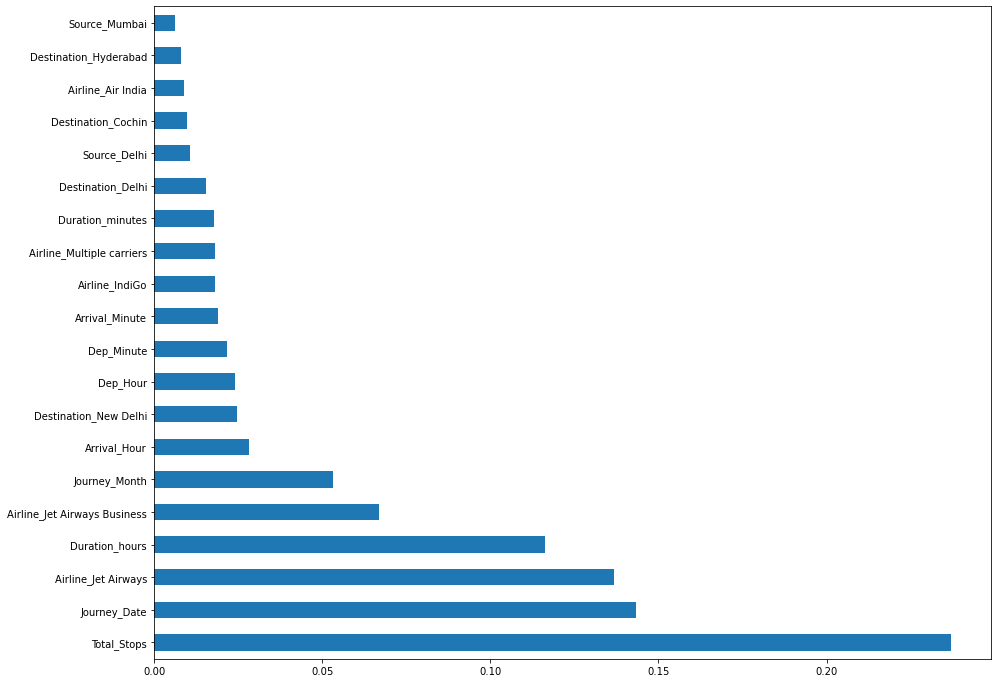

In [34]:
plt.figure(figsize=(15,12))
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind="barh")
plt.show();

## Model Evaluation

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
reg_rf=model.fit(X_train,y_train)

In [37]:
reg_rf.score(X_train,y_train)

0.9692482187959585

In [38]:
reg_rf.score(X_test,y_test)

0.8039197222458181

In [39]:
y_preds=reg_rf.predict(X_test)

In [40]:

from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_preds))
print("MSE:",metrics.mean_squared_error(y_test,y_preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_preds)))
print("R2_Score:",metrics.r2_score(y_test,y_preds))

MAE: 1225.5281063796601
MSE: 4227893.992992958
RMSE: 2056.1843285544605
R2_Score: 0.8039197222458181


## Hyper-Parameter Tuning
* Randomized SearchCV

In [48]:
%%time
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
random_grid={"n_estimators":np.arange(5,100,5),
            "max_depth":np.arange(5,50,5),
            "min_samples_split":[5,10,15,20,50,100],
            "criterion":["mse","mae"],
            "max_features":["auto","sqrt","log2"]}
rs_model=RandomizedSearchCV(ExtraTreesRegressor(n_jobs=4,
                                                 random_state=42),
                           param_distributions=random_grid,
                           n_iter=8,
                           cv=7,
                           verbose=True)
rs_model.fit(X_train,y_train)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed: 15.4min finished


Wall time: 16min 17s


RandomizedSearchCV(cv=7,
                   estimator=ExtraTreesRegressor(n_jobs=4, random_state=42),
                   n_iter=8,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10, 15, 20, 50,
                                                              100],
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   verbose=True)

In [49]:
rs_model.best_params_

{'n_estimators': 55,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'mae'}

In [50]:
rs_ypreds=rs_model.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test,rs_ypreds))
print("MSE:",metrics.mean_squared_error(y_test,rs_ypreds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,rs_ypreds)))
print("R2_Score:",metrics.r2_score(y_test,rs_ypreds))

MAE: 1129.1894499510784
MSE: 3531210.1709685703
RMSE: 1879.1514497156875
R2_Score: 0.8362303614330325


## Saving our Model

In [51]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rs_model, file)

In [52]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [60]:
from sklearn import metrics
model_preds=forest.predict(X_test)
metrics.r2_score(y_test,model_preds)

0.8362303614330325

In [61]:
pip freeze> requirements.txt

Note: you may need to restart the kernel to use updated packages.
